In [57]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import time
%matplotlib inline

In [58]:
test_systems = pd.read_csv("../../csvs/deltatimes.csv", index_col =0)
#test_systems.head()


(249, 8)
Average Sigma 0.615753561685 Std in Sigma 0.262996916324
(249, 8)


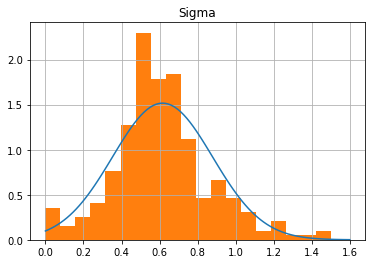

In [59]:
from scipy.stats import norm

valid_info_frame= pd.read_csv("../../Figures/ConvolutedFigures/Convolved_Params_249_IOU_valid.csv")
print valid_info_frame.shape
valid_info_frame["Sigma"] = np.abs(valid_info_frame["Sigma"])
bins = np.linspace(0, 1.5, 20)

mu_fit, sig_fit =  norm.fit(valid_info_frame["Sigma"].values)
print "Average Sigma", mu_fit, "Std in Sigma", sig_fit
#x, xmax = plt.xlim()
fig = plt.figure()
ax = fig.add_subplot("111")
x = np.linspace(0, 1.6, 100)
prob_sig = norm.pdf(x, mu_fit, sig_fit)
plt.plot(x, prob_sig)
valid_info_frame.hist("Sigma", normed = 1, ax = ax, bins = bins)
print valid_info_frame.shape

In [60]:
from scipy.stats import norm
# p is the sigma distribution

valid_delta_times = test_systems[(test_systems["t"]>1e4) 
        & (test_systems["t"]<1e7) & (test_systems["t_shadow"]>1e4)
        & (test_systems["t_shadow"]<1e7)]
print valid_delta_times.shape
print prob_sig[:10]
#print prob_sig.sum()
norm_prob_sig = prob_sig/(prob_sig.sum())
print norm_prob_sig[:10]
print x[:10]

(4825, 3)
[ 0.09786577  0.1127965   0.12951511  0.14815121  0.16883012  0.19167022
  0.21678005  0.24425527  0.27417544  0.30660068]
[ 0.0015959   0.00183938  0.00211201  0.00241591  0.00275312  0.00312557
  0.00353504  0.00398308  0.00447099  0.00499975]
[ 0.          0.01616162  0.03232323  0.04848485  0.06464646  0.08080808
  0.0969697   0.11313131  0.12929293  0.14545455]


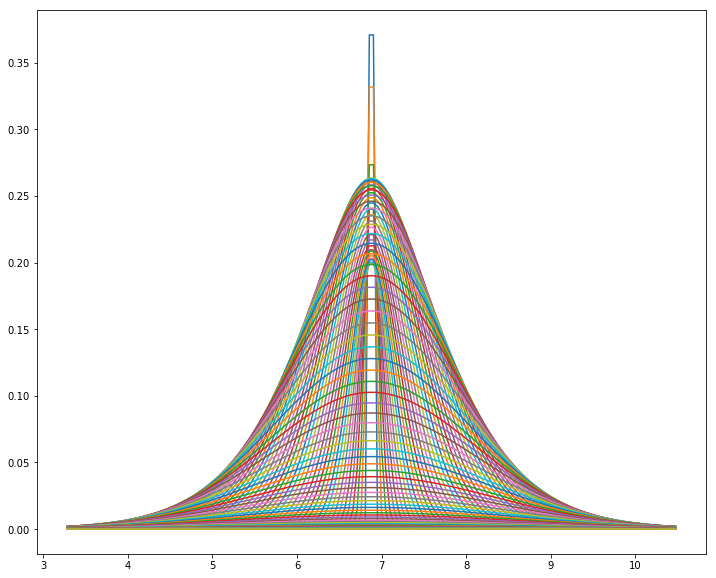

In [61]:
#Numerically
#try with the first 100
trial = 10 #how many to test it with
max_sigma = 0.6 #the center, used to define bins
increments = 150 # how fine does the convoltion have to be?

plt.figure(figsize=(12, 10))
#x is whawt stores the bins values (sigma values)
#prob_sig stpres the corresponding probability of that sigma
for i in range(5, trial,1):
    total_y= np.zeros(increments)
    for j in range(1,int(prob_sig.shape[0]), 1):
        fixed_sigma=x[j]
        t_sim = np.log10(valid_delta_times["t"].values[i])
        #print t_sim
        final_y = np.zeros(increments)
        bins = np.linspace(t_sim -6*max_sigma, t_sim +6*max_sigma, increments)

        for k, mu_test in enumerate(bins):
            #This is all equivalent to a gaussian centered around t_not with
            # sigma increased by a factor of sqrt 2. 
            #this code can be all simplfied
            
            p = norm.pdf(bins, mu_test, fixed_sigma)
            prob = (1./(2*np.pi*fixed_sigma**2)**0.5)*np.exp(-(mu_test-t_sim)**2/(2.*fixed_sigma**2) )
            p = p*prob*norm_prob_sig[j]
            #plt.plot(bins, p)
            final_y += p
            total_y +=p
            #if j  ==10:
            #    plt.plot(bins, p)
        #break
    #break
        #plt.figure()
        #p = norm.pdf(bins, t_sim, sig_fit)
        plt.plot(bins, final_y )
    break
plt.show()


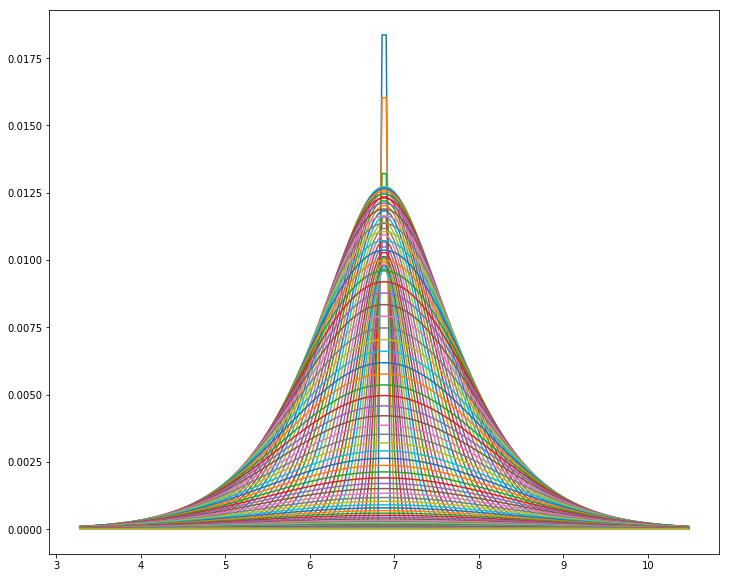

In [64]:
#Analytically over each of the mu;s, how to combine the sigmas?
#try with the first 100
trial = 10 #how many to test it with
max_sigma = 0.6 #the center, used to define bins
increments = 150 # how fine does the convoltion have to be?

plt.figure(figsize=(12, 10))
#x is whawt stores the bins values (sigma values)
#prob_sig stpres the corresponding probability of that sigma
for i in range(5, trial,1):
    total_y= np.zeros(increments)
    for j in range(1,int(prob_sig.shape[0]), 1):
        fixed_sigma=x[j]
        t_sim = np.log10(valid_delta_times["t"].values[i])
        #print t_sim
        #p = p*prob*norm_prob_sig[j]

        final_y = norm.pdf(bins, t_sim, fixed_sigma*2**0.5)* norm_prob_sig[j]
        
        total_y +=final_y
        
        plt.plot(bins, final_y )
    break
plt.show()


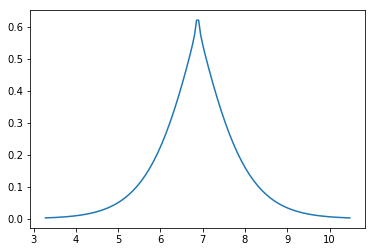

In [65]:
plt.plot(bins, total_y)

Try plotting all the differences once the cut is made, to see if assumptions are still valid


In [66]:
reduced_systems = test_systems[(test_systems["t"] > 1e4) &
                              (test_systems["t"] < 1e7) &
                              (test_systems["t_shadow"] > 1e4)
                              & (test_systems["t_shadow"]<1e7)]
print reduced_systems.shape
reduced_systems["diff"] = np.log10(reduced_systems["t"]) -np.log10(reduced_systems["t_shadow"])
reduced_systems = reduced_systems.replace([np.inf, -np.inf], np.nan)
reduced_systems = reduced_systems.dropna()
print reduced_systems.shape
reduced_systems.head()

(4825, 3)
(4825, 4)


/home/naireen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,runstring,t,t_shadow,diff
1,0000001.bin,1.348749e+05,213307.156880,-0.199074
21,0000021.bin,3.590242e+05,646731.388681,-0.255600
22,0000022.bin,2.025537e+06,311291.666001,0.813373
25,0000025.bin,3.708340e+05,671974.880182,-0.258173
28,0000028.bin,3.374641e+04,41949.192113,-0.094496


-0.00197534387546
0.407071371065


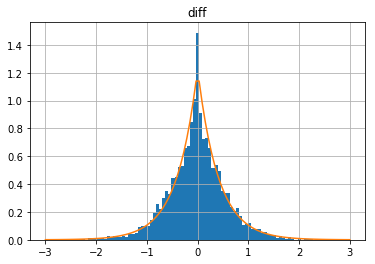

In [119]:
#print len(np.where(reduced_systems==-np.inf)[0])
#print np.where(reduced_systems ==-np.inf)
#print reduced_systems["diff"].min()
#print reduced_systems["diff"].max()
bins = np.linspace(-3,3,100)

reduced_systems.hist("diff", bins = bins, normed = 1)

from scipy.stats import laplace

fit1, fit2 =laplace.fit(reduced_systems["diff"].values)
print fit1
print fit2
rv =laplace(loc = 0, scale = fit2)
#loc should be zero, since this should be symmetric about t = 0
plt.plot(bins, rv.pdf(bins))


This seems to match the distribution we have been getting above,that we get that double exponential shape with the differences in the simulation times of the distributions that match the same period cuts

Just to make sure this is still valid, its still worthwhile doing that correlation test between mu and sigma, this should be very low

In [77]:
from scipy import stats
vals = stats.linregress(valid_info_frame["Mean"], valid_info_frame["Sigma"])
#the r value here is 0.305,
print vals
rvals = vals[2]
print rvals**2 # very low, don't need to worry about it

LinregressResult(slope=0.072101555076804338, intercept=0.16631976712670971, rvalue=0.30546212829388686, pvalue=8.9325057721538381e-07, stderr=0.014301081652498502)
0.0933071118218


Empty DataFrame
Columns: [Unnamed: 0, ID, Norm, Mean, Mean_Error, Sigma, Error, IOU]
Index: []


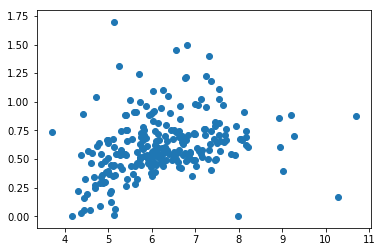

In [78]:
print valid_info_frame[valid_info_frame["Mean"] < 3]
plt.scatter(valid_info_frame["Mean"] , valid_info_frame["Sigma"])